In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[: , 1 : ]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [7]:
import matplotlib.pyplot as plt

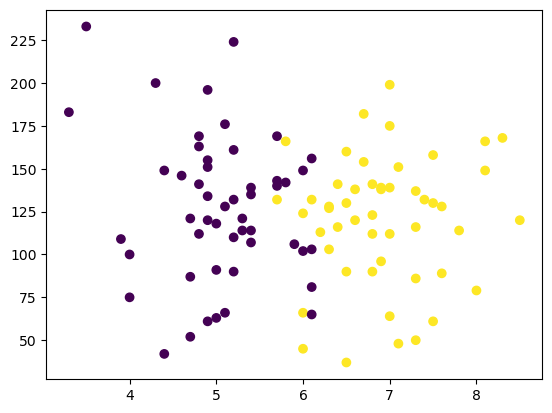

In [8]:
plt.scatter( df['cgpa'] , df['iq'] , c=df['placement'])

In [9]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test ,y_train,y_test = train_test_split( x , y, test_size=0.1)

In [14]:
y_test

33    0
3     1
4     0
56    0
91    1
35    1
18    0
39    0
43    1
8     0
Name: placement, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
x_train

array([[-1.46566026e+00,  1.89172028e+00],
       [ 2.81484422e-01,  1.20538743e-01],
       [ 6.30913359e-01,  7.60132076e-01],
       [-6.79445156e-01, -8.14251512e-01],
       [-1.37830303e+00,  6.37133358e-01],
       [ 1.06769953e-01, -4.94454846e-01],
       [-2.42658984e-01,  1.12912823e+00],
       [-9.41516859e-01, -1.52764408e+00],
       [ 8.92985062e-01, -2.73057154e-01],
       [-5.04730687e-01, -2.23857666e-01],
       [ 1.15505677e+00, -1.79824125e+00],
       [ 2.20334358e+00, -7.62592051e-02],
       [ 4.56198890e-01,  1.69738231e-01],
       [ 8.05627828e-01,  3.66536179e-01],
       [-2.42658984e-01,  2.18937718e-01],
       [-5.04730687e-01, -3.96055871e-01],
       [-2.42658984e-01,  4.89534897e-01],
       [ 1.06769953e-01,  2.18937718e-01],
       [ 9.80342296e-01, -1.84744074e+00],
       [-7.66802390e-01,  1.20538743e-01],
       [-9.41516859e-01,  6.86332846e-01],
       [ 1.94127187e-02,  2.21397692e-02],
       [-6.79445156e-01,  2.48211413e+00],
       [-7.

In [19]:
x_test = scaler.transform(x_test)

In [20]:
x_test

array([[ 0.01941272,  0.63713336],
       [ 1.242414  ,  0.21893772],
       [-0.15530175,  0.46493515],
       [ 0.10676995, -1.4292451 ],
       [ 1.32977123,  0.85853105],
       [ 0.71827059, -0.81425151],
       [-1.72773197, -0.56825408],
       [-1.20358856,  0.56333413],
       [ 0.71827059,  0.44033541],
       [ 0.10676995,  0.80933156]])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [23]:
# model training
clf.fit(x_train ,y_train)

LogisticRegression()

In [24]:
y_pred = clf.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test ,y_pred)

0.7

In [27]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

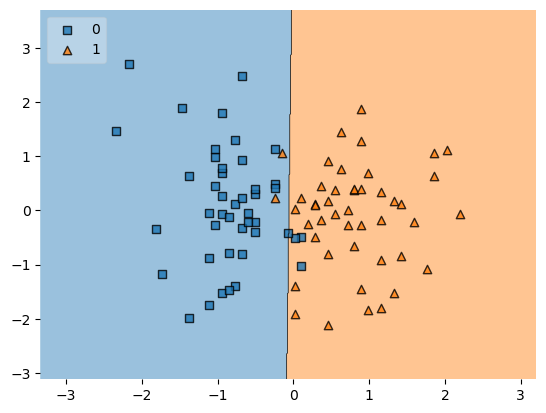

In [29]:
plot_decision_regions(x_train , y_train.values , clf=clf, legend=2)

In [30]:
import pickle

In [33]:
# pickle.dump( clf , open('model.pkl') , "wb")

In [34]:

"""To fix the error in the pickle.dump function, you need to close the second parentheses after the file name and specify the correct mode for opening the file. Here's the correct version of the code:

python
Copy code"""
import pickle

# Assuming 'clf' is your trained classifier
#clf = ...  # Your trained classifier goes here

# Save the classifier to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)